Import packages

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

locate the data

In [52]:
with open("Faults27x7_var", "r") as file:
    headers = [line.strip() for line in file.readlines()]

df = pd.read_csv("Faults.NNA", delimiter="\t", names=headers, header=None)

print(df.head()) #access the downloaded data and put headers file together with the data file

fault_types = headers[-7:]
print(fault_types)  #Show the faults in the data

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             

Display the data/the faults

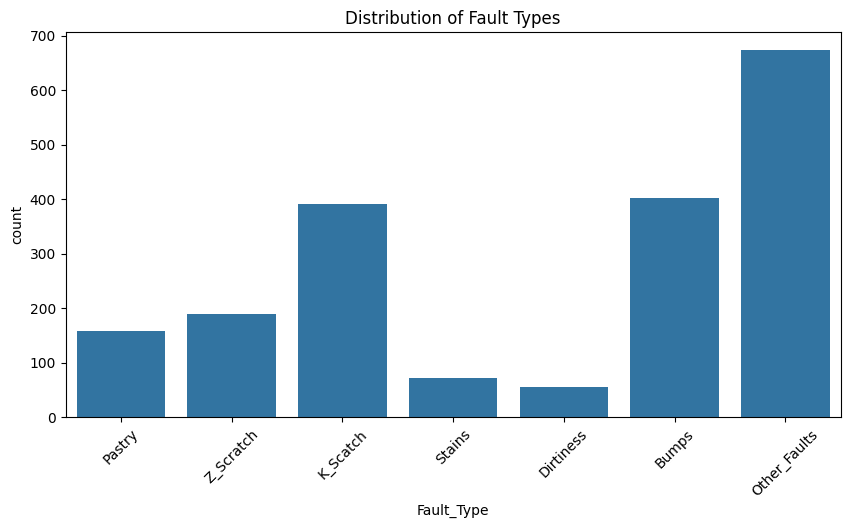

+--------------+-------+----------+-----------+--------+--------+-----------+
| Other_Faults | Bumps | K_Scatch | Z_Scratch | Pastry | Stains | Dirtiness |
+--------------+-------+----------+-----------+--------+--------+-----------+
|     673      |  402  |   391    |    190    |  158   |   72   |     55    |
+--------------+-------+----------+-----------+--------+--------+-----------+


In [53]:
df['Fault_Type'] = df[fault_types].idxmax(axis=1)

plt.figure(figsize=(10, 5))
sns.countplot(x='Fault_Type', data=df)
plt.title('Distribution of Fault Types')
plt.xticks(rotation=45)
plt.show()

counts = df['Fault_Type'].value_counts()

table = PrettyTable()

for fault in counts.index:
    table.add_column(fault, [counts[fault]])

print(table)

Preprocessing the data

In [54]:
#Getting the features
X = df.drop('Fault_Type', axis=1)
#Getting the faults
y = df['Fault_Type']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)